In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## About the dataset:

Source: https://www.kaggle.com/datasets/joebeachcapital/diamonds/data

Features:
- carat is a measure of diamond weight. One carat is equivalent to 0.2 grams.
- clarity refers to how clear a diamond is. Diamonds often contain imperfections like cracks or mineral deposits. The fewer and less noticeable a diamond’s imperfections, the better its clarity. clarity contains 8 ordered levels, from “I1” (the worst) to “IF” (the best).
- color refers to the color of the diamond. Colorless diamonds are considered better than diamonds with a yellow tint. diamonds contains diamonds of 7 different colors, represented by different letters. “D” - “F” diamonds are considered colorless, while “G” - “J” diamonds have a very faint color.
- cut refers to how a rough diamond is shaped into a finished diamond. Better cuts create more symmetrical and luminous diamonds. cut has 5 ordered levels: “Fair,” “Good,” “Very Good,” “Premium,” “Ideal.”
- x, y, z, depth, and table are various measures of a diamond’s size, in millimeters

## Goal: 
Based on the given features, predict the diamond prices. 
Selected model for the task: RandomForestRegressor

In [2]:
df = pd.read_csv('data/diamonds.csv')

In [3]:
# Rearrange the columns
diamond_columns = ["carat", "cut", "color", "clarity", "depth", "table", "x", "y", "z", "price"]

In [4]:
df = df[diamond_columns]

In [5]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2757


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
# Split the data to 'X' and 'y':
X = df.drop("price", axis = 1)

In [8]:
y = df["price"]

In [9]:
# Convert non-numerical data to numerical:
# 1. Import OneHotEncoder and ColumnTransfromer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# 2. Define the categorical features to transform
categorical_features = ["cut", "color", "clarity"]

# 3. Create an instance of OneHotEncoder
one_hot = OneHotEncoder()

# 4. Create an instance of ColumnTransformer
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)], remainder="passthrough")

# 5. Turn the categorical features into numbers
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.  , 0.  , 1.  , ..., 3.95, 3.98, 2.43],
       [0.  , 0.  , 0.  , ..., 3.89, 3.84, 2.31],
       [0.  , 1.  , 0.  , ..., 4.05, 4.07, 2.31],
       ...,
       [0.  , 0.  , 0.  , ..., 5.66, 5.68, 3.56],
       [0.  , 0.  , 0.  , ..., 6.15, 6.12, 3.74],
       [0.  , 0.  , 1.  , ..., 5.83, 5.87, 3.64]])

In [10]:
# Split the data into training and test sets:
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.25)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40455, 26), (13485, 26), (40455,), (13485,))

In [12]:
# Selected model: RandomForestRegressor 
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9808420256850187

In [13]:
# Predictions:
y_preds = model.predict(X_test)
y_preds[:10]

array([  571.9 ,  2335.44,  1216.83,  1239.48, 10024.29,  4166.22,
        1780.88,  1810.7 ,  2041.2 ,  5752.58])

In [14]:
prices = pd.DataFrame({"actual values": y_test, "predictions": y_preds})
prices

,actual values,predictions
1388,559,571.90
50052,2201,2335.44
41645,1238,1216.83
42377,1304,1239.48
17244,6901,10024.29
...,...,...
36825,957,1135.98
24803,13187,12576.26
20999,9215,9100.11
8471,4416,4344.19


In [15]:
# Regression model evaluation:

# Mean Absolute Error: 
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

272.1638465137631

In [16]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_preds)


300965.8729456287

In [17]:
%%time
# The model performs well, but for practice let's tune hyperparameters with RandomizedSearchCV. This most likely will cause the model to perform slightly worse.
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "n_estimators": np.arange(10, 200, 10),
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "max_features": [0.5, 1.0, "sqrt"],
    "max_samples": [10000]
}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                             param_distributions=param_dist,
                             n_iter=20,
                             cv=5,
                             verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 2min 48s
Wall time: 2min 49s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 5, 10, 15],
                                        'max_features': [0.5, 1.0, 'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   verbose=True)

In [18]:
# And the best params are...
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 15}

In [19]:
# Train model again with the best parameters:

ideal_model = RandomForestRegressor(n_estimators=90,
                                   min_samples_split=8,
                                   min_samples_leaf=3,
                                   max_samples=10000,
                                   max_features=0.5,
                                   max_depth=15)

ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, max_features=0.5, max_samples=10000,
                      min_samples_leaf=3, min_samples_split=8, n_estimators=90)

In [20]:
# As predicted, the score decreased slightly. 
ideal_model.score(X_test, y_test)

0.9775752449251329

In [21]:
y_preds_ideal = ideal_model.predict(X_test)
y_preds_ideal[:10]

array([ 515.36772401, 2332.12435831, 1129.52088382, 1198.8654488 ,
       9549.52851405, 3983.62963841, 1740.77524003, 1807.87179829,
       2193.36763363, 5803.96636034])

In [22]:
prices2 = pd.DataFrame({"actual values": y_test, "predictions": y_preds_ideal })
prices2

,actual values,predictions
1388,559,515.367724
50052,2201,2332.124358
41645,1238,1129.520884
42377,1304,1198.865449
17244,6901,9549.528514
...,...,...
36825,957,1267.751065
24803,13187,12161.026155
20999,9215,8635.192855
8471,4416,4286.077209


In [23]:
mean_absolute_error(y_test, y_preds_ideal)

308.4470576680587

## Actual values vs. Predicted values (with hyperparameters)

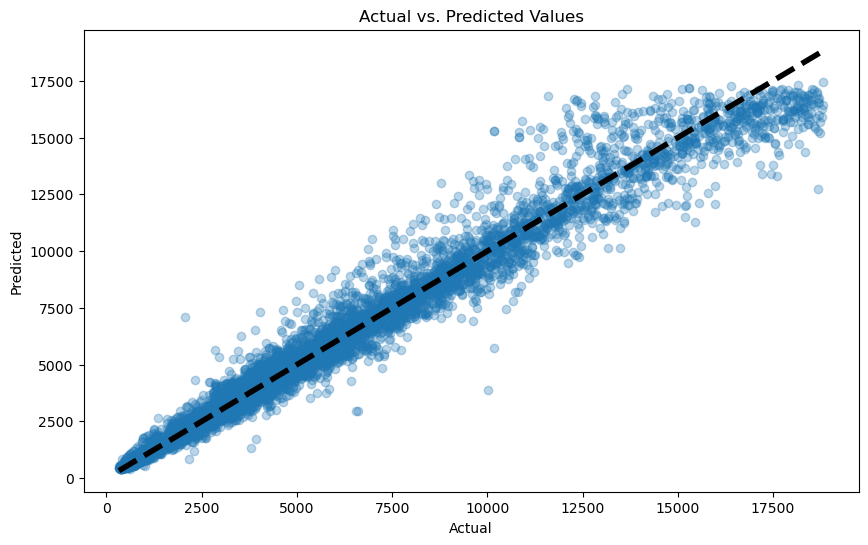

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_preds_ideal, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

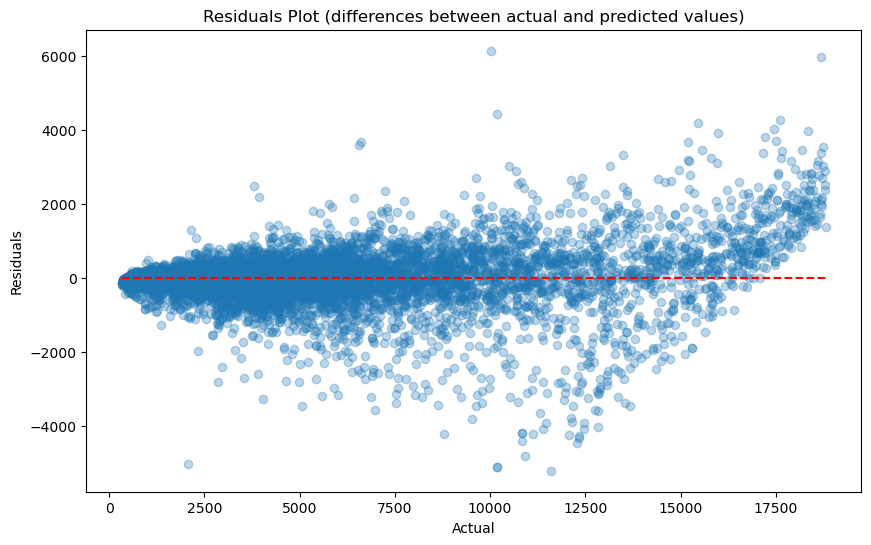

In [34]:
residuals = y_test - y_preds_ideal
plt.figure(figsize=(10,6))
plt.scatter(y_test, residuals, alpha=0.3)
plt.hlines(y=0, xmin=y.min(), xmax=y.max(), colors='red', linestyles='--')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residuals Plot (differences between actual and predicted values)')
plt.show()


## Actual values vs. Predicted values (no hyperparameters)

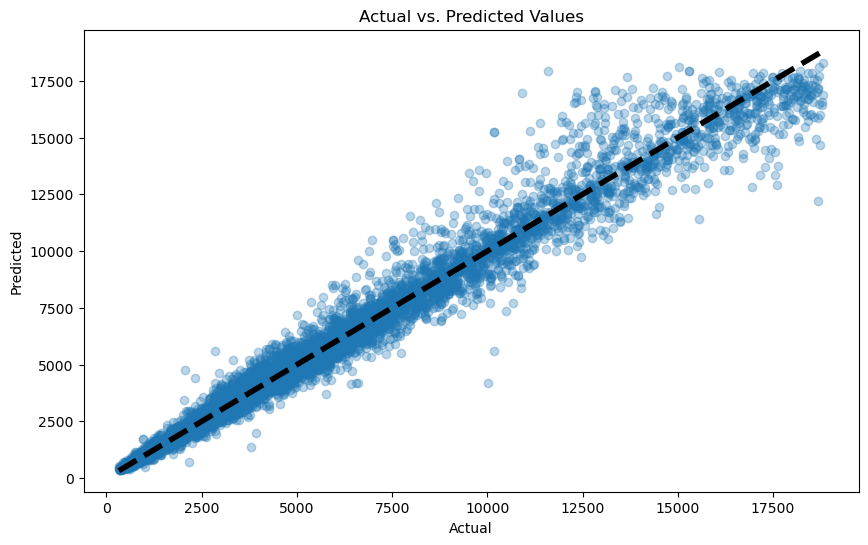

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_preds, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

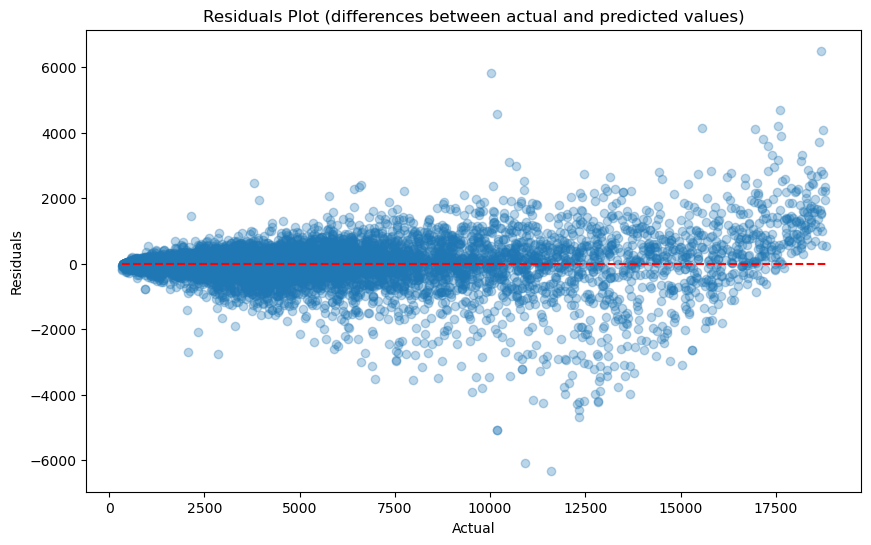

In [37]:
residuals = y_test - y_preds
plt.figure(figsize=(10,6))
plt.scatter(y_test, residuals, alpha=0.3)
plt.hlines(y=0, xmin=y.min(), xmax=y.max(), colors='red', linestyles='--')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residuals Plot (differences between actual and predicted values)')
plt.show()